## Initialization

In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import fnmatch
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

## Import Datasets

In [ ]:
petaBencana = pd.read_csv("./dataset/PetaBencanaDataset.csv")
# kemiskinan_jabar = pd.read_csv("./dataset/2020-2021_KemiskinanJabar.csv")
# inflasi_bulanan_raw = pd.read_csv('./dataset/inflasi_raw.csv')
kemiskinan_jabar_2010_2020 = pd.read_csv('./dataset/2010-2020_KemiskinanJabar.csv')
kemiskinan_jabar_2020_2021 = pd.read_csv('./dataset/2020-2021_KemiskinanJabar.csv')
kemiskinan_jabar_2002_2020 = pd.read_csv('./dataset/2002-2020_KemiskinanJabar.csv')
ip_jabar = pd.read_csv("./dataset/2010-2019_IndeksPendidikanJabar.csv")
ip_jabar2021 = pd.read_csv('./dataset/2020-2021_IndeksPendidikan.csv')
kepadatan_jabar = pd.read_csv("./dataset/2013-2021_KepadatanPendudukJabar.csv")
pengangguran_jabar = pd.read_csv("./dataset/2013-2020_PengangguranTerbukaJabar.csv")
pengangguran21 = pd.read_csv('./dataset/2021_PengangguranTerbuka.csv')
luas_jabar = pd.read_csv('./dataset/luasWilayahJabar.csv')
covidjabar = pd.read_csv('./dataset/CovidJabar.csv')

## EDA & Pre-Processing

### Peta Bencana Dataset

In [ ]:
petaBencana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pkey           4235 non-null   int64  
 1   date           4235 non-null   object 
 2   time           4235 non-null   object 
 3   source         4235 non-null   object 
 4   status         4235 non-null   object 
 5   url            3570 non-null   object 
 6   image_url      3334 non-null   object 
 7   disaster_type  4235 non-null   object 
 8   report_dat     3455 non-null   object 
 9   tags           4235 non-null   object 
 10  title          188 non-null    object 
 11  text           3830 non-null   object 
 12  ID_Desa        4227 non-null   float64
 13  ID_Kec         4227 non-null   float64
 14  ID_Kab         4227 non-null   float64
 15  ID_Prov        4227 non-null   float64
 16  Desa           4227 non-null   object 
 17  Kecamatan      4227 non-null   object 
 18  Kabupate

In [ ]:
petaBencana.head()

,pkey,date,time,source,status,url,image_url,disaster_type,report_dat,tags,...,ID_Desa,ID_Kec,ID_Kab,ID_Prov,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
0,94941,01/01/2020,00:03:02,grasp,confirmed,2042596d-b551-4ef2-803d-1ee964cf2278,https://images.petabencana.id/2042596d-b551-4e...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",...,3.174020e+09,3174020.0,3174.0,31.0,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.76866,-6.16978
1,95061,01/01/2020,00:43:02,grasp,confirmed,5a0ad45f-7020-43b7-882f-672487ebc6d8,https://images.petabencana.id/5a0ad45f-7020-43...,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.275061e+09,3275061.0,3275.0,32.0,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.97870,-6.17944
2,95062,01/01/2020,01:14:53,grasp,confirmed,e065b40d-2084-48d6-b42f-1f98cb33e4cc,NaN,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",...,3.172060e+09,3172060.0,3172.0,31.0,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.89100,-6.23449
3,95063,01/01/2020,01:15:08,grasp,confirmed,7cb26903-b1c8-4be7-8b81-7014c8a83fbd,https://images.petabencana.id/7cb26903-b1c8-4b...,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.216061e+09,3216061.0,3216.0,32.0,Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.16189,-6.30170
4,95064,01/01/2020,01:18:03,grasp,confirmed,570d2cb8-d5b6-404f-86ef-8a2a0d27f391,https://images.petabencana.id/570d2cb8-d5b6-40...,flood,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...","{ ""district_id"": ""3173"", ""local_area_id"": ""193...",...,3.173060e+09,3173060.0,3173.0,31.0,Cempaka Baru,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.86092,-6.16859


In [ ]:
percentage_missing_val = ((petaBencana.isnull().sum()/len(petaBencana))*100)
percentage_missing_val[percentage_missing_val>0]

url           15.702479
image_url     21.275089
report_dat    18.417946
title         95.560803
text           9.563164
ID_Desa        0.188902
ID_Kec         0.188902
ID_Kab         0.188902
ID_Prov        0.188902
Desa           0.188902
Kecamatan      0.188902
Kabupaten      0.165289
Provinsi       0.165289
dtype: float64

Didapatkan dataset peta bencana masih memiliki row null. Dengan komposisi row null terbesar di kolom "url

### Kemiskinan Jabar Dataset

In [ ]:
kemiskinan_jabar_2020_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nama Wilayah   56 non-null     object 
 1   Persen Miskin  56 non-null     float64
 2   Jumlah Miskin  56 non-null     float64
 3   IKM            56 non-null     float64
 4   Tahun          56 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
kemiskinan_jabar_2020_2021.shape

(56, 5)

In [ ]:
kemiskinan_jabar_2020_2021.head()

,Nama Wilayah,Persen Miskin,Jumlah Miskin,IKM,Tahun
0,JAWA BARAT,7.88,3920.23,1.13,2020
1,Bogor,7.69,465.67,0.83,2020
2,Sukabumi,7.09,175.10,0.80,2020
3,Cianjur,10.36,234.47,1.38,2020
4,Bandung,6.91,263.60,0.92,2020


In [ ]:
kemiskinan_jabar_2020_2021.describe()

,Persen Miskin,Jumlah Miskin,IKM,Tahun
count,56.000000,56.000000,56.000000,56.000000
mean,8.677321,289.842143,1.306429,2020.500000
std,2.787776,738.988828,0.535002,0.504525
min,2.450000,11.160000,0.290000,2020.000000
25%,7.105000,80.150000,0.917500,2020.000000
50%,8.615000,143.735000,1.275000,2020.500000
75%,10.665000,213.162500,1.635000,2021.000000
max,13.130000,4195.340000,2.460000,2021.000000


In [ ]:
kemiskinan_jabar_2010_2020.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_penduduk,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,9.97,PERSEN,2010
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,10.65,PERSEN,2010
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,14.32,PERSEN,2010
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,9.30,PERSEN,2010
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,13.94,PERSEN,2010


In [ ]:
kemiskinan_jabar_2010_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   292 non-null    int64  
 1   kode_provinsi        292 non-null    int64  
 2   nama_provinsi        292 non-null    object 
 3   kode_kabupaten_kota  292 non-null    int64  
 4   nama_kabupaten_kota  292 non-null    object 
 5   persentase_penduduk  292 non-null    float64
 6   satuan               292 non-null    object 
 7   tahun                292 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


In [ ]:
kemiskinan_jabar_2010_2020.shape

(292, 8)

In [ ]:
kemiskinan_jabar_2010_2020.describe()

,id,kode_provinsi,kode_kabupaten_kota,persentase_penduduk,tahun
count,292.000000,292.0,292.000000,292.000000,292.000000
mean,146.500000,32.0,3231.561644,9.505514,2015.051370
std,84.437354,0.0,31.472559,3.511846,3.164575
min,1.000000,32.0,3201.000000,2.070000,2010.000000
25%,73.750000,32.0,3207.000000,7.117500,2012.000000
50%,146.500000,32.0,3214.000000,9.345000,2015.000000
75%,219.250000,32.0,3273.000000,11.992500,2018.000000
max,292.000000,32.0,3279.000000,20.710000,2020.000000


In [ ]:
kemiskinan_jabar_2002_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      513 non-null    int64  
 1   kode_provinsi           513 non-null    int64  
 2   nama_provinsi           513 non-null    object 
 3   kode_kabupaten_kota     513 non-null    int64  
 4   nama_kabupaten_kota     513 non-null    object 
 5   jumlah_penduduk_miskin  513 non-null    float64
 6   satuan                  513 non-null    object 
 7   tahun                   513 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 32.2+ KB


In [ ]:
kemiskinan_jabar_2002_2020.shape

(513, 8)

In [ ]:
kemiskinan_jabar_2002_2020.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penduduk_miskin,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,451.3,RIBU JIWA,2002
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,362.2,RIBU JIWA,2002
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,368.6,RIBU JIWA,2002
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,543.3,RIBU JIWA,2002
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,323.7,RIBU JIWA,2002


In [ ]:
kemiskinan_jabar_2002_2020.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_penduduk_miskin,tahun
count,513.000000,513.0,513.000000,513.000000,513.000000
mean,257.000000,32.0,3231.333333,169.740019,2011.000000
std,148.234611,0.0,31.232307,126.791167,5.482572
min,1.000000,32.0,3201.000000,0.000000,2002.000000
25%,129.000000,32.0,3207.000000,65.200000,2006.000000
50%,257.000000,32.0,3214.000000,147.200000,2011.000000
75%,385.000000,32.0,3273.000000,247.940000,2016.000000
max,513.000000,32.0,3279.000000,619.000000,2020.000000


### Indeks Pendidikan 

In [ ]:
ip_jabar.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,indeks_pendidikan,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,51.55,POIN,2010
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,47.39,POIN,2010
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,47.30,POIN,2010
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,56.65,POIN,2010
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,51.03,POIN,2010


In [ ]:
ip_jabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   267 non-null    int64  
 1   kode_provinsi        267 non-null    int64  
 2   nama_provinsi        267 non-null    object 
 3   kode_kabupaten_kota  267 non-null    int64  
 4   nama_kabupaten_kota  267 non-null    object 
 5   indeks_pendidikan    267 non-null    float64
 6   satuan               267 non-null    object 
 7   tahun                267 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 16.8+ KB


In [ ]:
ip_jabar.shape

(267, 8)

In [ ]:
ip_jabar.describe()

,id,kode_provinsi,kode_kabupaten_kota,indeks_pendidikan,tahun
count,267.000000,267.0,267.000000,267.000000,267.000000
mean,134.000000,32.0,3231.483146,60.349551,2014.539326
std,77.220464,0.0,31.403311,7.266394,2.868245
min,1.000000,32.0,3201.000000,45.480000,2010.000000
25%,67.500000,32.0,3207.000000,55.110000,2012.000000
50%,134.000000,32.0,3214.000000,58.430000,2015.000000
75%,200.500000,32.0,3273.000000,65.655000,2017.000000
max,267.000000,32.0,3279.000000,75.860000,2019.000000


In [ ]:
ip_jabar2021.head()

,nama_kabupaten_kota,indeks_pendidikan,Tahun
0,JAWA BARAT,63.22,2020
1,Bogor,62.33,2020
2,Sukabumi,57.54,2020
3,Cianjur,57.24,2020
4,Bandung,65.12,2020


In [ ]:
ip_jabar2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nama_kabupaten_kota  56 non-null     object 
 1   indeks_pendidikan    56 non-null     float64
 2   Tahun                56 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
ip_jabar2021.shape

(56, 3)

In [ ]:
ip_jabar2021.describe()

,indeks_pendidikan,Tahun
count,56.000000,56.000000
mean,64.201964,2020.500000
std,6.561033,0.504525
min,55.030000,2020.000000
25%,59.015000,2020.000000
50%,62.805000,2020.500000
75%,69.185000,2021.000000
max,76.890000,2021.000000


### Kepadatan Penduduk

In [ ]:
kepadatan_jabar.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kepadatan_penduduk,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,1263,JIWA/KM2,2013
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,584,JIWA/KM2,2013
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,611,JIWA/KM2,2013
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,2013,JIWA/KM2,2013
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,700,JIWA/KM2,2013


In [ ]:
kepadatan_jabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   243 non-null    int64 
 1   kode_provinsi        243 non-null    int64 
 2   nama_provinsi        243 non-null    object
 3   kode_kabupaten_kota  243 non-null    int64 
 4   nama_kabupaten_kota  243 non-null    object
 5   kepadatan_penduduk   243 non-null    int64 
 6   satuan               243 non-null    object
 7   tahun                243 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 15.3+ KB


In [ ]:
kepadatan_jabar.shape

(243, 8)

In [ ]:
kepadatan_jabar.describe()

,id,kode_provinsi,kode_kabupaten_kota,kepadatan_penduduk,tahun
count,243.000000,243.0,243.000000,243.000000,243.000000
mean,122.000000,32.0,3231.333333,3649.670782,2017.000000
std,70.292247,0.0,31.266252,4284.119979,2.587318
min,1.000000,32.0,3201.000000,0.000000,2013.000000
25%,61.500000,32.0,3207.000000,833.500000,2015.000000
50%,122.000000,32.0,3214.000000,1311.000000,2017.000000
75%,182.500000,32.0,3273.000000,6662.000000,2019.000000
max,243.000000,32.0,3279.000000,15076.000000,2021.000000


### Pengangguran Terbuka

In [ ]:
pengangguran21.head()

,nama_kabupaten_kota,persentase_tingkat_pengangguran_terbuka,Tahun
0,Kabupaten Bogor,12.22,2021
1,Kabupaten Sukabumi,9.51,2021
2,Kabupaten Cianjur,9.32,2021
3,Kabupaten Bandung,8.32,2021
4,Kabupaten Garut,8.68,2021


In [ ]:
pengangguran21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   nama_kabupaten_kota                      28 non-null     object 
 1   persentase_tingkat_pengangguran_terbuka  28 non-null     float64
 2   Tahun                                    28 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 800.0+ bytes


In [ ]:
pengangguran21.shape

(28, 3)

In [ ]:
pengangguran21.describe()

,persentase_tingkat_pengangguran_terbuka,Tahun
count,28.000000,28.0
mean,9.416071,2021.0
std,2.389746,0.0
min,3.250000,2021.0
25%,8.315000,2021.0
50%,9.795000,2021.0
75%,11.025000,2021.0
max,13.070000,2021.0


In [ ]:
pengangguran_jabar.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_tingkat_pengangguran_terbuka,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,7.87,PERSEN,2013
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,10.38,PERSEN,2013
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,14.18,PERSEN,2013
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,10.12,PERSEN,2013
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,8.14,PERSEN,2013


In [ ]:
pengangguran_jabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id                                       216 non-null    int64  
 1   kode_provinsi                            216 non-null    int64  
 2   nama_provinsi                            216 non-null    object 
 3   kode_kabupaten_kota                      216 non-null    int64  
 4   nama_kabupaten_kota                      216 non-null    object 
 5   persentase_tingkat_pengangguran_terbuka  187 non-null    float64
 6   satuan                                   216 non-null    object 
 7   tahun                                    216 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 13.6+ KB


In [ ]:
pengangguran_jabar.shape

(216, 8)

In [ ]:
pengangguran_jabar.describe()

,id,kode_provinsi,kode_kabupaten_kota,persentase_tingkat_pengangguran_terbuka,tahun
count,216.000,216.0,216.000000,187.000000,216.00000
mean,108.500,32.0,3231.333333,8.532406,2016.50000
std,62.498,0.0,31.274330,2.191402,2.29661
min,1.000,32.0,3201.000000,3.340000,2013.00000
25%,54.750,32.0,3207.000000,7.120000,2014.75000
50%,108.500,32.0,3214.000000,8.550000,2016.50000
75%,162.250,32.0,3273.000000,9.805000,2018.25000
max,216.000,32.0,3279.000000,14.880000,2020.00000


### Luas Jawa Barat

In [ ]:
luas_jabar.head()

,nama_kabupaten_kota,luas,Tahun
0,Bogor,"2,710.62",2020
1,Sukabumi,"4,145.70",2020
2,Cianjur,"3,840.16",2020
3,Bandung,"1,767.96",2020
4,Garut,"3,074.07",2020


In [ ]:
luas_jabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nama_kabupaten_kota  56 non-null     object
 1   luas                 56 non-null     object
 2   Tahun                56 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


In [ ]:
luas_jabar.shape

(56, 3)

In [ ]:
luas_jabar.describe()

,Tahun
count,56.000000
mean,2020.500000
std,0.504525
min,2020.000000
25%,2020.000000
50%,2020.500000
75%,2021.000000
max,2021.000000


### COVID Jawa Barat

In [ ]:
covidjabar.head()

,tanggal,kode_kab_kota,nama_kab_kota,konfirmasi_total,konfirmasi_sembuh,konfirmasi_meninggal,konfirmasi_aktif,konfirmasi_total_daily_growth,konfirmasi_sembuh_daily_growth,konfirmasi_meninggal_daily_growth,konfirmasi_aktif_daily_growth,kota_kab_belum_teridentifikasi,sembuh_unidentified,meninggal_unidentified,id
0,2020-03-01 00:00:00,32,jawa barat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1
1,2020-03-01 00:00:00,3204,Kabupaten Bandung,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2
2,2020-03-01 00:00:00,3217,Kabupaten Bandung Barat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3
3,2020-03-01 00:00:00,3216,Kabupaten Bekasi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4
4,2020-03-01 00:00:00,3201,Kabupaten Bogor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,5


In [ ]:
covidjabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25228 entries, 0 to 25227
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tanggal                            25228 non-null  object 
 1   kode_kab_kota                      25228 non-null  int64  
 2   nama_kab_kota                      25228 non-null  object 
 3   konfirmasi_total                   24327 non-null  float64
 4   konfirmasi_sembuh                  24327 non-null  float64
 5   konfirmasi_meninggal               24327 non-null  float64
 6   konfirmasi_aktif                   24327 non-null  float64
 7   konfirmasi_total_daily_growth      24327 non-null  float64
 8   konfirmasi_sembuh_daily_growth     24327 non-null  float64
 9   konfirmasi_meninggal_daily_growth  24327 non-null  float64
 10  konfirmasi_aktif_daily_growth      24327 non-null  float64
 11  kota_kab_belum_teridentifikasi     901 non-null    flo

In [ ]:
covidjabar.shape

(25228, 15)

In [ ]:
covidjabar.describe()

,kode_kab_kota,konfirmasi_total,konfirmasi_sembuh,konfirmasi_meninggal,konfirmasi_aktif,konfirmasi_total_daily_growth,konfirmasi_sembuh_daily_growth,konfirmasi_meninggal_daily_growth,konfirmasi_aktif_daily_growth,kota_kab_belum_teridentifikasi,sembuh_unidentified,meninggal_unidentified,id
count,25228.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,901.000000,901.000000,901.000000,25228.000000
mean,3117.071429,16608.624245,15557.824023,270.791631,780.008591,47.355243,46.007810,0.653471,0.693961,2.420644,2.402886,0.009989,12614.500000
std,594.524124,28266.740183,27154.834031,418.837835,2488.253104,167.034810,271.822683,5.879496,259.705350,32.523284,16.248650,0.110101,7282.840632
min,32.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,-15644.000000,0.000000,0.000000,0.000000,1.000000
25%,3206.750000,393.500000,230.000000,10.000000,15.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,6307.750000
50%,3213.500000,6404.000000,5881.000000,115.000000,99.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12614.500000
75%,3272.250000,16681.000000,15836.000000,314.000000,579.000000,27.000000,16.000000,0.000000,6.000000,0.000000,0.000000,0.000000,18921.250000
max,3279.000000,185901.000000,182682.000000,2256.000000,45894.000000,3828.000000,15836.000000,397.000000,3213.000000,943.000000,277.000000,2.000000,25228.000000


### Data Manipulation

Replacement Code

In [ ]:
kota_replacements = {
                 'Kabupaten Bogor': 'KABUPATEN BOGOR',
                 'Kabupaten Sukabumi': 'KABUPATEN SUKABUMI',
                 'Kabupaten Cianjur': 'KABUPATEN CIANJUR',
                 'Kabupaten Bandung': 'KABUPATEN BANDUNG',
                 'Kabupaten Garut': 'KABUPATEN GARUT',
                 'Kabupaten Tasikmalaya': 'KABUPATEN TASIKMALAYA',
                 'Kabupaten Ciamis': 'KABUPATEN CIAMIS',
                 'Kabupaten Kuningan': 'KABUPATEN KUNINGAN',
                 'Kabupaten Cirebon': 'KABUPATEN CIREBON',
                 'Kabupaten Majalengka': 'KABUPATEN MAJALENGKA',
                 'Kabupaten Sumedang': 'KABUPATEN SUMEDANG',
                 'Kabupaten Indramayu': 'KABUPATEN INDRAMAYU',
                 'Kabupaten Subang': 'KABUPATEN SUBANG',
                 'Kabupaten Purwakarta': 'KABUPATEN PURWAKARTA',
                 'Kabupaten Karawang': 'KABUPATEN KARAWANG',
                 'Kabupaten Bekasi': 'KABUPATEN BEKASI',
                 'Kabupaten Bandung Barat': 'KABUPATEN BANDUNG BARAT',
                 'Kabupaten Pangandaran': 'KABUPATEN PANGANDARAN',
                 'Kota Bogor': 'KOTA BOGOR',
                 'Kota Sukabumi': 'KOTA SUKABUMI',
                 'Kota Bandung': 'KOTA BANDUNG',
                 'Kota Cirebon': 'KOTA CIREBON',
                 'Kota Bekasi': 'KOTA BEKASI',
                 'Kota Depok': 'KOTA DEPOK',
                 'Kota Cimahi': 'KOTA CIMAHI',
                 'Kota Tasikmalaya': 'KOTA TASIKMALAYA',
                 'Kota Banjar': 'KOTA BANJAR' 
        }
nama_kota_replacements = {
                 'Bogor': 'KABUPATEN BOGOR',
                 'Sukabumi': 'KABUPATEN SUKABUMI',
                 'Cianjur': 'KABUPATEN CIANJUR',
                 'Bandung': 'KABUPATEN BANDUNG',
                 'Garut': 'KABUPATEN GARUT',
                 'Tasikmalaya': 'KABUPATEN TASIKMALAYA',
                 'Ciamis': 'KABUPATEN CIAMIS',
                 'Kuningan': 'KABUPATEN KUNINGAN',
                 'Cirebon': 'KABUPATEN CIREBON',
                 'Majalengka': 'KABUPATEN MAJALENGKA',
                 'Sumedang': 'KABUPATEN SUMEDANG',
                 'Indramayu': 'KABUPATEN INDRAMAYU',
                 'Subang': 'KABUPATEN SUBANG',
                 'Purwakarta': 'KABUPATEN PURWAKARTA',
                 'Karawang': 'KABUPATEN KARAWANG',
                 'Bekasi': 'KABUPATEN BEKASI',
                 'Bandung Barat': 'KABUPATEN BANDUNG BARAT',
                 'Pangandaran': 'KABUPATEN PANGANDARAN',
                 'Kota Bogor': 'KOTA BOGOR',
                 'Kota Sukabumi': 'KOTA SUKABUMI',
                 'Kota Bandung': 'KOTA BANDUNG',
                 'Kota Cirebon': 'KOTA CIREBON',
                 'Kota Bekasi': 'KOTA BEKASI',
                 'Kota Depok': 'KOTA DEPOK',
                 'Kota Cimahi': 'KOTA CIMAHI',
                 'Kota Tasikmalaya': 'KOTA TASIKMALAYA',
                 'Kota Banjar': 'KOTA BANJAR' 
        }

Manipulation Codes

In [ ]:
# Finds index with "JAWA BARAT"
kemiskinan_jabar_2020_2021.loc[kemiskinan_jabar_2020_2021['Nama Wilayah'] == "JAWA BARAT"].index
# Removes "JAWA BARAT" and only selects the year 2021
kmk_jabar_20_21_v1 = kemiskinan_jabar_2020_2021.drop([0, 28]).loc[kemiskinan_jabar_2020_2021['Tahun'] == 2021]
# Drops unused column
kmk_jabar_20_21_v1.drop(['Jumlah Miskin', 'IKM'], axis = 1, inplace = True)
# Renames columns
kmk_jabar_20_21_v1.rename(columns ={
    'Nama Wilayah': 'nama_kabupaten_kota',
    'Persen Miskin': 'persentase_penduduk',
    'Tahun': 'tahun' 
}, inplace = True)
# Renames kabupatens
kmk_jabar_20_21_v1.nama_kabupaten_kota.replace(nama_kota_replacements, inplace = True)
# Concats the two datasets
kemiskinan_jabar_2010_2021 = kemiskinan_jabar_2010_2020.copy(deep=True)
kemiskinan_jabar_2010_2021.drop(labels=[x for x in kemiskinan_jabar_2010_2020.columns if x not in ['nama_kabupaten_kota', 'tahun', 'persentase_penduduk']], axis = 1, inplace = True)
kemiskinan_jabar_2010_2021 = pd.concat([kemiskinan_jabar_2010_2021, kmk_jabar_20_21_v1], axis=0)

In [ ]:
bencanajabar = petaBencana.loc[(petaBencana['Provinsi'] == 'Jawa Barat')]
bencanajabar['dateFixed'] = pd.to_datetime(bencanajabar['date'])
bencana_2021 = bencanajabar.loc[bencanajabar['dateFixed'] >= "2021-01-01"]
bencana_2021_a = bencana_2021[['Kabupaten','status','dateFixed']]
disCount = bencana_2021_a.groupby(['Kabupaten']).count()
bencana_2020 = bencanajabar.loc[(bencanajabar['dateFixed'] <= "2020-12-31") & (bencanajabar['dateFixed'] >= "2020-01-01")]
bencana_2020_a = bencana_2020[['Kabupaten','status','dateFixed']]
disasterCount = bencana_2020_a.groupby(['Kabupaten']).count()

/tmp/ipykernel_1124/3360898207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bencanajabar['dateFixed'] = pd.to_datetime(bencanajabar['date'])


In [ ]:
arr_d_count = [ 466, 24, 5, 1, 59, 4, 0, 4, 0, 5, 0, 20, 1, 2, 0, 1, 318, 0, 0, 0, 0, 0, 0, 0, 21, 0, 1, 0]
d_count_2021 = [261, 21, 3, 7, 21, 2, 0, 1, 0, 1, 1, 2, 10, 8, 0, 17, 155, 1, 1, 0, 0, 0, 0, 0, 6, 4, 0, 0]

d_count = {"disaster_count":[i for i in (arr_d_count+d_count_2021)]}
data_d_count = pd.DataFrame(d_count)

In [ ]:
kemiskinan_jabar_2002_2020.rename(columns ={
    'nama_kabupaten_kota': 'Nama Wilayah',
    'tahun': 'Tahun',
    'jumlah_penduduk_miskin' : 'Jumlah Miskin'
}, inplace = True)
kemiskinan_jabar_10_19 = kemiskinan_jabar_2002_2020[kemiskinan_jabar_2002_2020['Tahun'] > 2009]
kemiskinan_jabar_10_19 = kemiskinan_jabar_10_19[kemiskinan_jabar_10_19['Tahun'] < 2020]
kemiskinan_jabar_10_19 = kemiskinan_jabar_10_19[['Nama Wilayah','Jumlah Miskin' ,'Tahun']]

In [ ]:
# Renames kabupatens
ip_jabar2021.nama_kabupaten_kota.replace(nama_kota_replacements, inplace = True)
pengangguran21.nama_kabupaten_kota.replace(kota_replacements, inplace = True)
pengangguran21.rename(columns ={
    'Tahun': 'tahun'
}, inplace = True)
ip_jabar2021.rename(columns ={
    'Tahun': 'tahun'
}, inplace = True)

In [ ]:
data_merged = pd.concat([kemiskinan_jabar_2020_2021, data_d_count], axis="columns")
data_merged['Nama Wilayah'] = data_merged['Nama Wilayah'].replace(nama_kota_replacements)
kemiskinan = pd.merge(kemiskinan_jabar_10_19, data_merged,on=['Nama Wilayah', 'Tahun', 'Jumlah Miskin'],how='outer')

In [ ]:
ip_jabar_ = ip_jabar[['nama_kabupaten_kota', 'indeks_pendidikan', 'tahun']]
pengangguran_jabar_ = pengangguran_jabar[['nama_kabupaten_kota', 'persentase_tingkat_pengangguran_terbuka', 'tahun']]
kepadatan_jabar_ = kepadatan_jabar[['nama_kabupaten_kota','kepadatan_penduduk','tahun']]
ip_final = pd.concat([ip_jabar_, ip_jabar2021], axis=0)
pengangguran_final = pd.concat([pengangguran_jabar_, pengangguran21], axis =0)

In [ ]:
data_merger = pd.merge(ip_final,pengangguran_final,on=['nama_kabupaten_kota', 'tahun'],how='outer')
data_merger_ = pd.merge(data_merger,kepadatan_jabar_,on=['nama_kabupaten_kota', 'tahun'],how='outer')
data_merger_.rename(columns = {'nama_kabupaten_kota':'Nama Wilayah', 'tahun' : 'Tahun'}, inplace = True)

In [ ]:
merged =  pd.merge(data_merger_,kemiskinan,on=['Nama Wilayah', 'Tahun'],how='outer')

In [ ]:
covidjabar = covidjabar[['tanggal', 'nama_kab_kota', 'konfirmasi_aktif']]
covidjabar['tanggal'] = pd.to_datetime(covidjabar['tanggal'])
covidjabar['Tahun'] = covidjabar['tanggal'].dt.year
covidjabar.nama_kab_kota = covidjabar.nama_kab_kota.apply(lambda x: x.upper())
covidjabar = covidjabar.groupby(['Tahun', 'nama_kab_kota'], as_index = False).mean()
covidjabar.drop(covidjabar.loc[covidjabar['nama_kab_kota'] == "JAWA BARAT"].index, inplace=True)
covidjabar.reset_index(inplace=True, drop=True)
covidjabar.rename(columns = {"nama_kab_kota": "Nama Wilayah"}, inplace=True)

In [ ]:
luas_jabar['nama_kabupaten_kota'] = luas_jabar['nama_kabupaten_kota'].replace(nama_kota_replacements)
luas_jabar.rename(columns ={
    'nama_kabupaten_kota': 'Nama Wilayah'
}, inplace = True)

from locale import atof, setlocale, LC_NUMERIC
setlocale(LC_NUMERIC, '')
luas_jabar['luas'] = luas_jabar['luas'].apply(lambda x : atof(x))

merged_ = pd.merge(merged, luas_jabar,on=['Nama Wilayah', 'Tahun'],how='outer')
merged_ = pd.merge(merged_, covidjabar, on=['Nama Wilayah', 'Tahun'], how='outer')

In [ ]:
merged_.head()

,Nama Wilayah,indeks_pendidikan,Tahun,persentase_tingkat_pengangguran_terbuka,kepadatan_penduduk,Jumlah Miskin,Persen Miskin,IKM,disaster_count,luas,konfirmasi_aktif
0,KABUPATEN BOGOR,51.55,2010,NaN,NaN,477.2,NaN,NaN,NaN,NaN,NaN
1,KABUPATEN SUKABUMI,47.39,2010,NaN,NaN,249.6,NaN,NaN,NaN,NaN,NaN
2,KABUPATEN CIANJUR,47.30,2010,NaN,NaN,311.0,NaN,NaN,NaN,NaN,NaN
3,KABUPATEN BANDUNG,56.65,2010,NaN,NaN,296.3,NaN,NaN,NaN,NaN,NaN
4,KABUPATEN GARUT,51.03,2010,NaN,NaN,335.6,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset_reglin = merged_[merged_['Tahun'] >= 2020].dropna().reset_index(drop=True).rename(columns ={
    'Jumlah Miskin': 'jumlah_miskin',
    'Persen Miskin': 'persen_miskin'})
dataset_reglin.head()

,Nama Wilayah,indeks_pendidikan,Tahun,persentase_tingkat_pengangguran_terbuka,kepadatan_penduduk,jumlah_miskin,persen_miskin,IKM,disaster_count,luas,konfirmasi_aktif
0,KABUPATEN BOGOR,62.33,2020,14.29,1893.0,465.67,7.69,0.83,24.0,2710.62,282.274510
1,KABUPATEN SUKABUMI,57.54,2020,9.60,634.0,175.10,7.09,0.80,5.0,4145.70,101.584967
2,KABUPATEN CIANJUR,57.24,2020,11.05,617.0,234.47,10.36,1.38,1.0,3840.16,14.552288
3,KABUPATEN BANDUNG,65.12,2020,8.58,2027.0,263.60,6.91,0.92,59.0,1767.96,189.111111
4,KABUPATEN GARUT,58.15,2020,8.96,818.0,262.78,9.98,0.97,4.0,3074.07,109.143791


### Visualization

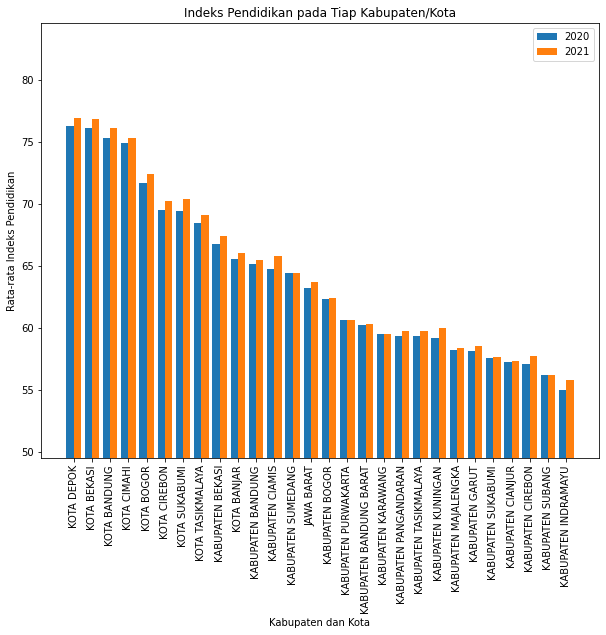

In [ ]:
sorted_nama_kab = ip_jabar2021.loc[ip_jabar2021['tahun'] == 2020].sort_values(by="indeks_pendidikan", ascending=False).nama_kabupaten_kota
ip20 = pd.merge(sorted_nama_kab, ip_jabar2021.loc[ip_jabar2021['tahun'] == 2020], on="nama_kabupaten_kota", how="inner").indeks_pendidikan
ip21 = pd.merge(sorted_nama_kab, ip_jabar2021.loc[ip_jabar2021['tahun'] == 2021], on="nama_kabupaten_kota", how="inner").indeks_pendidikan

X_axis = np.arange(len(ip_jabar2021.nama_kabupaten_kota.unique()))
fig = plt.figure() 
fig.set_size_inches(10,8)
plt.bar(X_axis - 0.2, ip20, 0.4, label="2020")
plt.bar(X_axis + 0.2, ip21, 0.4, label="2021")

plt.xticks(X_axis, sorted_nama_kab, rotation="vertical")
plt.xlabel("Kabupaten dan Kota")
plt.ylabel("Rata-rata Indeks Pendidikan")
plt.title("Indeks Pendidikan pada Tiap Kabupaten/Kota")
plt.ylim(ip_jabar2021.indeks_pendidikan.min() * 0.9, ip_jabar2021.indeks_pendidikan.max() * 1.1)
plt.legend()
plt.show()

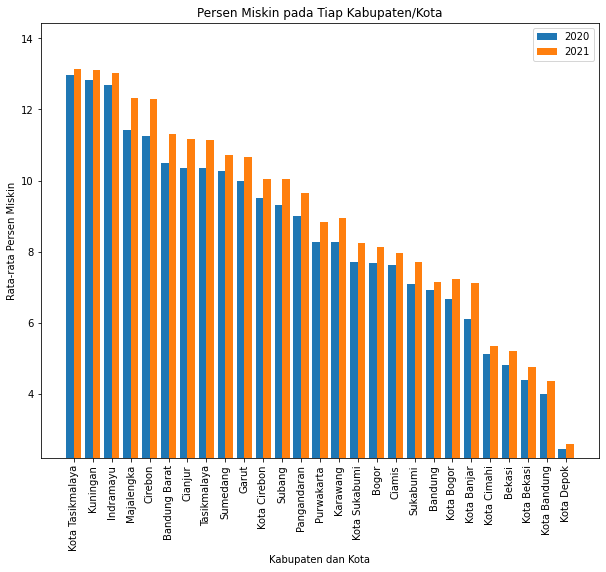

In [ ]:
kemiskinan_jabar_2020_2021 = kemiskinan_jabar_2020_2021.drop(kemiskinan_jabar_2020_2021.loc[kemiskinan_jabar_2020_2021['Nama Wilayah'] == "JAWA BARAT"].index).reset_index(drop=True)
sorted_nama_kab = kemiskinan_jabar_2020_2021.loc[kemiskinan_jabar_2020_2021['Tahun'] == 2020].sort_values(by="Persen Miskin", ascending=False)["Nama Wilayah"]

kemiskinan20 = pd.merge(sorted_nama_kab, kemiskinan_jabar_2020_2021.loc[kemiskinan_jabar_2020_2021['Tahun'] == 2020], on="Nama Wilayah", how="inner")['Persen Miskin']
kemiskinan21 = pd.merge(sorted_nama_kab, kemiskinan_jabar_2020_2021.loc[kemiskinan_jabar_2020_2021['Tahun'] == 2021], on="Nama Wilayah", how="inner")['Persen Miskin']

X_axis = np.arange(len(kemiskinan_jabar_2020_2021['Nama Wilayah'].unique()))
fig = plt.figure() 
fig.set_size_inches(10,8)
plt.bar(X_axis - 0.2, kemiskinan20, 0.4, label="2020")
plt.bar(X_axis + 0.2, kemiskinan21, 0.4, label="2021")

plt.xticks(X_axis, sorted_nama_kab, rotation="vertical")
plt.xlabel("Kabupaten dan Kota")
plt.ylabel("Rata-rata Persen Miskin")
plt.title("Persen Miskin pada Tiap Kabupaten/Kota")
plt.ylim(kemiskinan_jabar_2020_2021['Persen Miskin'].min() * 0.9, kemiskinan_jabar_2020_2021['Persen Miskin'].max() * 1.1)
plt.legend()
plt.show()

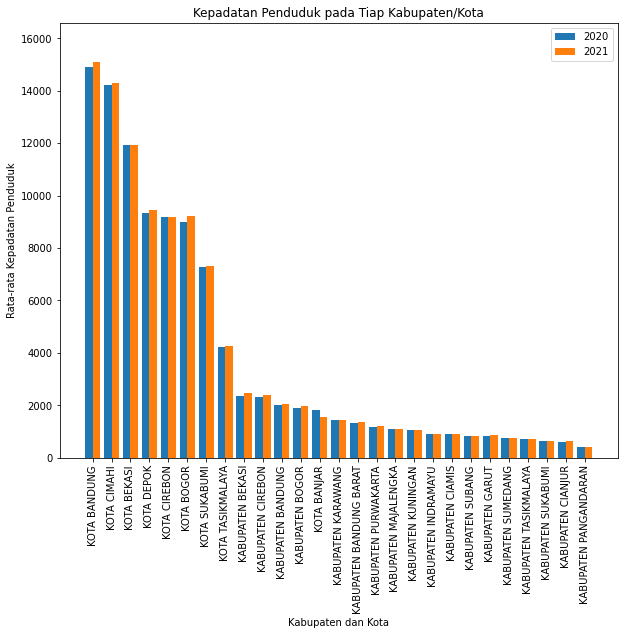

In [ ]:
kepadatan_jabar = kepadatan_jabar.drop(kepadatan_jabar.loc[kepadatan_jabar['nama_kabupaten_kota'] == "JAWA BARAT"].index).reset_index(drop=True)
sorted_nama_kab = kepadatan_jabar.loc[kepadatan_jabar['tahun'] == 2020].sort_values(by="kepadatan_penduduk", ascending=False).nama_kabupaten_kota

padat20 = pd.merge(sorted_nama_kab, kepadatan_jabar.loc[kepadatan_jabar['tahun'] == 2020], on="nama_kabupaten_kota", how="inner")['kepadatan_penduduk']
padat21 = pd.merge(sorted_nama_kab, kepadatan_jabar.loc[kepadatan_jabar['tahun'] == 2021], on="nama_kabupaten_kota", how="inner")['kepadatan_penduduk']

X_axis = np.arange(len(kepadatan_jabar['nama_kabupaten_kota'].unique()))
fig = plt.figure() 
fig.set_size_inches(10,8)
plt.bar(X_axis - 0.2, padat20, 0.4, label="2020")
plt.bar(X_axis + 0.2, padat21, 0.4, label="2021")

plt.xticks(X_axis, sorted_nama_kab, rotation="vertical")
plt.xlabel("Kabupaten dan Kota")
plt.ylabel("Rata-rata Kepadatan Penduduk")
plt.title("Kepadatan Penduduk pada Tiap Kabupaten/Kota")
plt.ylim(kepadatan_jabar['kepadatan_penduduk'].min() * 0.9, kepadatan_jabar['kepadatan_penduduk'].max() * 1.1)
plt.legend()
plt.show()

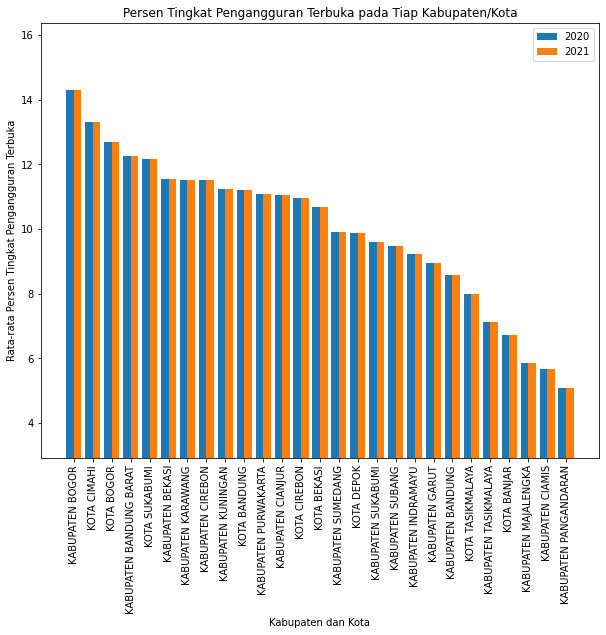

In [ ]:
sorted_nama_kab = pengangguran_final.loc[pengangguran_final['tahun'] == 2020].sort_values(by="persentase_tingkat_pengangguran_terbuka", ascending=False).nama_kabupaten_kota
guran20 = pd.merge(sorted_nama_kab, pengangguran_final.loc[pengangguran_final['tahun'] == 2020], on="nama_kabupaten_kota", how="inner")['persentase_tingkat_pengangguran_terbuka']
guran21 = pd.merge(sorted_nama_kab, pengangguran_final.loc[pengangguran_final['tahun'] == 2020], on="nama_kabupaten_kota", how="inner")['persentase_tingkat_pengangguran_terbuka']

X_axis = np.arange(guran20.size)
fig = plt.figure() 
fig.set_size_inches(10,8)
plt.bar(X_axis - 0.2, guran20, 0.4, label="2020")
plt.bar(X_axis + 0.2, guran21, 0.4, label="2021")

plt.xticks(X_axis, sorted_nama_kab, rotation="vertical")
plt.xlabel("Kabupaten dan Kota")
plt.ylabel("Rata-rata Persen Tingkat Pengangguran Terbuka")
plt.title("Persen Tingkat Pengangguran Terbuka pada Tiap Kabupaten/Kota")
plt.ylim(pengangguran_final['persentase_tingkat_pengangguran_terbuka'].min() * 0.9, pengangguran_final['persentase_tingkat_pengangguran_terbuka'].max() * 1.1)
plt.legend()
plt.show()

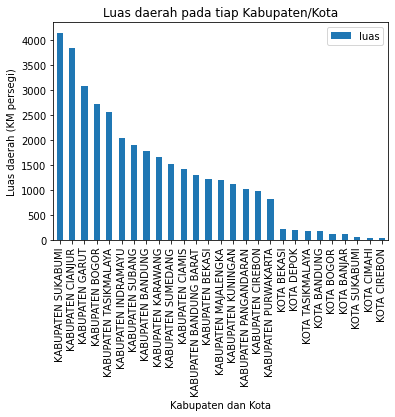

In [ ]:
luas_jabar = luas_jabar.drop(luas_jabar.loc[luas_jabar['Nama Wilayah'] == "JAWA BARAT"].index).reset_index(drop=True)
sorted_nama_kab = luas_jabar.loc[luas_jabar.Tahun == 2020].sort_values(by="luas", ascending=False)['Nama Wilayah']
val = pd.merge(sorted_nama_kab, luas_jabar.loc[luas_jabar.Tahun == 2020], on="Nama Wilayah", how="inner")
val.plot.bar(x="Nama Wilayah", y="luas")

plt.xlabel("Kabupaten dan Kota")
plt.ylabel("Luas daerah (KM persegi)")
plt.title("Luas daerah pada tiap Kabupaten/Kota")
plt.show()

## Modeling

In [ ]:
predictor = "indeks_pendidikan +  persentase_tingkat_pengangguran_terbuka + kepadatan_penduduk"
predictor = predictor + " + disaster_count + luas + konfirmasi_aktif"
y, X = dmatrices(
    'persen_miskin ~ ' + predictor,
     data=dataset_reglin, 
     return_type='dataframe'
    )
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          persen_miskin   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     13.92
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           5.03e-09
Time:                        23:29:48   Log-Likelihood:                -104.85
No. Observations:                  54   AIC:                             223.7
Df Residuals:                      47   BIC:                             237.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  32.7074      6.504      5.029      0.000      19.623      45.792
indeks_pendidikan                          -0.3528      0.100     -3.515      0.001      -0.555      -0.151
persentase_tingkat_pengangguran_terbuka     0.0353      0.126      0.280      0.780      -0.218       0.288
kepadatan_penduduk                      -6.659e-05      0.000     -0.459      0.649      -0.000       0.000
disaster_count                             -0.0125      0.006     -2.180      0.034      -0.024      -0.001
luas                                       -0.0009      0.000     -2.691      0.010      -0.001      -0.000
konfirmasi_aktif                           -0.0002      0.000     -0.827      0.412      -0.001       0.000
==============================================================================
Omnibus:                        5.406   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                4.345
Skew:                           0.580   Prob(JB):                        0.114
Kurtosis:                       3.764   Cond. No.                     1.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
predictor = "indeks_pendidikan + disaster_count + luas"
y, X = dmatrices(
    'persen_miskin ~ ' + predictor,
     data=dataset_reglin, 
     return_type='dataframe'
    )
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          persen_miskin   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     28.78
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           5.92e-11
Time:                        23:29:48   Log-Likelihood:                -105.35
No. Observations:                  54   AIC:                             218.7
Df Residuals:                      50   BIC:                             226.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            36.3329      3.633     10.001      0.000      29.036      43.630
indeks_pendidikan    -0.4096      0.052     -7.869      0.000      -0.514      -0.305
disaster_count       -0.0115      0.005     -2.251      0.029      -0.022      -0.001
luas                 -0.0009      0.000     -2.992      0.004      -0.001      -0.000
==============================================================================
Omnibus:                        7.554   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.710
Skew:                           0.717   Prob(JB):                       0.0349
Kurtosis:                       3.962   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f59f799-430e-4287-8131-e51ce43b55e7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>